# Netflix Data Analysis

# IMPORTING THE LIBRARIES

In [190]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the data set 

In [191]:
df=pd.read_csv(r"C:\Users\vanda\OneDrive\Desktop\PySpider\project1\netflix_titles.csv")

UNDERSTAND EACH COLUMN

In [192]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

| Column Name    | Description                                      |
| -------------- | ------------------------------------------------ |
| `show_id`      | Unique ID for each show/movie.                   |
| `type`         | Whether it's a "Movie" or a "TV Show".           |
| `title`        | Title of the content.                            |
| `director`     | Director of the content. Can be null.            |
| `cast`         | List of cast members. Can be null.               |
| `country`      | Country of origin. Can be null.                  |
| `date_added`   | Date it was added to Netflix.                    |
| `release_year` | Year the content was released.                   |
| `rating`       | Content rating (e.g., PG, TV-MA, R).             |
| `duration`     | Duration of the content (in minutes or seasons). |
| `listed_in`    | Genre/categories.                                |
| `description`  | Brief description/summary.                       |


GET THE INFORMATION OF COLUMNS AND NOTE THE OBSERVATION

In [193]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


understand the data inside the dataframe using head()

In [194]:
df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# Data cleaning

1. Find and Handle Null Values



In [195]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

2. Replace missing values with placeholder

In [196]:
df['director'] = df['director'].fillna("Not Available")
df['cast'] = df['cast'].fillna("Not Available")
df['country'] = df['country'].fillna("Not Available")
df['date_added'] = df['date_added'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unrated")

In [197]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


3. Remove Duplicate Records

In [198]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

4. Strip Extra Spaces

In [199]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [200]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


5. Convert Date_added to Datetime

In [201]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [202]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

6. Separate Duration into Numeric + Unit

In [203]:
# Create two new columns: Duration_int, Duration_unit
df[['Duration_int', 'Duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\D+)')
df['Duration_int'] = pd.to_numeric(df['Duration_int'], errors='coerce')


In [204]:
df[['Duration_int', 'Duration_unit']]

,Duration_int,Duration_unit
0,90.0,min
1,2.0,Seasons
2,1.0,Season
3,1.0,Season
4,2.0,Seasons
...,...,...
8802,158.0,min
8803,2.0,Seasons
8804,88.0,min
8805,88.0,min


7.  Fill Missing Date_Added

In [205]:
df['date_added'] = df['date_added'].fillna(pd.to_datetime("2000-01-01"))

8. Fill Missing Duration, Duration_int, and Duration_unit

In [206]:
# Fill original duration column with a placeholder
df['Duration'] = df['Duration'].fillna("0 Unknown")

# Then recompute Duration_int and Duration_unit
df[['Duration_int', 'Duration_unit']] = df['Duration'].str.extract(r'(\d+)\s*(\D+)')
df['Duration_int'] = pd.to_numeric(df['Duration_int'], errors='coerce').fillna(0).astype(int)
df['Duration_unit'] = df['Duration_unit'].fillna("Unknown")


KeyError: 'Duration'

9. Drop rows with missing values in numeric columns

In [ ]:
df[['Duration_int', 'Release_Year', 'Added_Year', 'Cast']].dropna()


,Duration_int,Release_Year,Added_Year,Cast
0,90.0,2020,2021,Not Available
1,2.0,2021,2021,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,1.0,2021,2021,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,1.0,2021,2021,Not Available
4,2.0,2021,2021,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...,...,...,...
8802,158.0,2007,2019,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,2.0,2018,2019,Not Available
8804,88.0,2009,2019,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,88.0,2006,2020,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


10. Convert cast list to number of cast members

In [ ]:
df['Num_Cast'] = df['Cast'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)


In [ ]:
df['Num_Cast']

0        1
1       19
2        9
3        1
4        8
        ..
8802    10
8803     1
8804     7
8805     9
8806     8
Name: Num_Cast, Length: 8807, dtype: int64

11. Remove extreme outliers in duration

In [ ]:
df[df['Duration_int'] < 300]  # Keep movies < 5 hrs


,Show_ID,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,ListedIn,Description,Duration_int,Duration_unit,Added_Year,Added_Month,Added_Day,Title_Length,Is_Kids,Num_Cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,2021,9,25,20,0,1
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons,2021,9,24,13,0,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season,2021,9,24,9,0,9
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season,2021,9,24,21,0,1
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons,2021,9,24,12,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min,2019,11,20,6,0,10
8803,s8804,TV Show,Zombie Dumb,Not Available,Not Available,Not Available,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons,2019,7,1,11,1,1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min,2019,11,1,10,0,7
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min,2020,1,11,4,0,9


12. Drop rows with missing Duration_int and Duration_unit

In [ ]:
df = df.dropna(subset=['Duration_int', 'Duration_unit'])


13. Final Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Show_ID        8804 non-null   object        
 1   Type           8804 non-null   object        
 2   Title          8804 non-null   object        
 3   Director       8804 non-null   object        
 4   Cast           8804 non-null   object        
 5   Country        8804 non-null   object        
 6   Date_Added     8804 non-null   datetime64[ns]
 7   Release_Year   8804 non-null   int64         
 8   Rating         8804 non-null   object        
 9   Duration       8804 non-null   object        
 10  ListedIn       8804 non-null   object        
 11  Description    8804 non-null   object        
 12  Duration_int   8804 non-null   float64       
 13  Duration_unit  8804 non-null   object        
 14  Added_Year     8804 non-null   int32         
 15  Added_Month    8804 non-nu

# DATA TRANSFORMATION

1.  Rename Columns for Clarity

In [ ]:
df.rename(columns={'show_id': 'Show_ID', 'date_added': 'Date_Added', 'release_year': 'Release_Year','title':'Title','cast':'Cast','type':'Type',
                   'country':'Country','director':'Director','rating':'Rating','duration':'Duration','listed_in':'ListedIn','description':'Description'}, inplace=True)


In [ ]:
df.columns

Index(['Show_ID', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date_Added',
       'Release_Year', 'Rating', 'Duration', 'ListedIn', 'Description',
       'Duration_int', 'Duration_unit'],
      dtype='object')

2. Extract Year, Month, and Day from Date_Added

In [ ]:
df['Added_Year'] = df['Date_Added'].dt.year
df['Added_Month'] = df['Date_Added'].dt.month
df['Added_Day'] = df['Date_Added'].dt.day


In [ ]:
df[['Added_Year','Added_Month','Added_Day']]

,Added_Year,Added_Month,Added_Day
0,2021,9,25
1,2021,9,24
2,2021,9,24
3,2021,9,24
4,2021,9,24
...,...,...,...
8802,2019,11,20
8803,2019,7,1
8804,2019,11,1
8805,2020,1,11


3. Create a New Column for Title Length



In [ ]:
df['Title_Length'] = df['Title'].apply(len)


In [ ]:
df['Title_Length']

0       20
1       13
2        9
3       21
4       12
        ..
8802     6
8803    11
8804    10
8805     4
8806     6
Name: Title_Length, Length: 8807, dtype: int64

4. Create a New Column Showing Whether the Content is for Kids or Not

In [ ]:
kids_ratings = ['G', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']
df['Is_Kids'] = df['Rating'].apply(lambda x: 1 if x in kids_ratings else 0)


In [ ]:
df['Is_Kids']

0       0
1       0
2       0
3       0
4       0
       ..
8802    0
8803    1
8804    0
8805    0
8806    0
Name: Is_Kids, Length: 8807, dtype: int64

# Data Analysis

1. Count the Number of Movies and TV Shows

In [ ]:
df.groupby('Type').size()


Type
Movie      6131
TV Show    2676
dtype: int64

2. Total Number of Titles Released Each Year

In [ ]:
df.groupby('Release_Year')['Title'].count().sort_index(ascending=True)


Release_Year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: Title, Length: 74, dtype: int64

3. Average Duration of Movies (in minutes)



In [ ]:
df[df['Duration_unit'] == 'min'].groupby('Type')['Duration_int'].mean()


Type
Movie    99.577187
Name: Duration_int, dtype: float64

4. Number of Shows by Country

In [ ]:
df.groupby('Country')['Title'].count().sort_values(ascending=False).head(10)


Country
United States     2818
India              972
Not Available      831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: Title, dtype: int64

5. Which year had the highest number of new content added to Netflix?

In [ ]:
df['Added_Year'].value_counts().sort_index(ascending=False).head(10)



Added_Year
2021    1498
2020    1879
2019    2016
2018    1649
2017    1188
2016     429
2015      82
2014      24
2013      11
2012       3
Name: count, dtype: int64

6. Which countries produce the most Netflix content?

In [ ]:
df['Country'].value_counts().head(10)


Country
United States     2818
India              972
Not Available      831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

7. What are the top 5 countries producing the most kids' content?

In [ ]:
df[df['Is_Kids'] == 1]['Country'].value_counts().head(5)


Country
United States     300
Not Available     209
United Kingdom     47
Canada             42
India              29
Name: count, dtype: int64

8. Which directors have the most titles on Netflix?

In [ ]:
df[df['Director'] != 'Not Available']['Director'].value_counts().head(5)


Director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Name: count, dtype: int64

9. How many titles are suitable for kids?



In [ ]:
df['Is_Kids'].sum()


np.int64(908)

10. What are the most common genres on Netflix?

In [ ]:
df['ListedIn'].value_counts().head(10)


ListedIn
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

# Data Visualization

In [208]:
df.rename(columns={'show_id': 'Show_ID', 'date_added': 'Date_Added', 'release_year': 'Release_Year','title':'Title','cast':'Cast','type':'Type',
                   'country':'Country','director':'Director','rating':'Rating','duration':'Duration','listed_in':'ListedIn','description':'Description'}, inplace=True)


1. What is the distribution of content types on Netflix?

C:\Users\vanda\Flutter projects\digitome_app\ipykernel_31224\2685872743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c=sns.countplot(data=df, x='Type', palette='Set2')


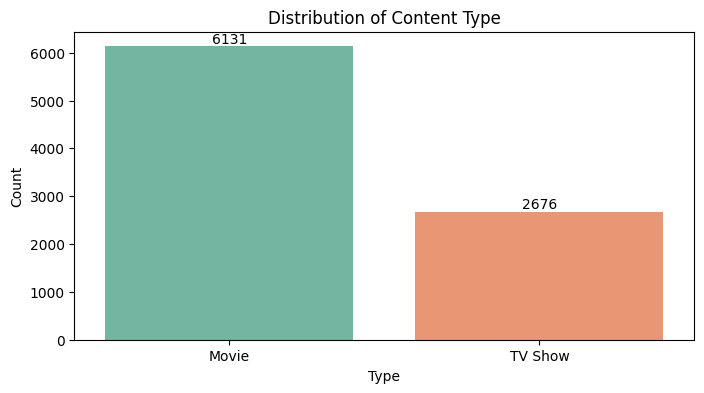

In [211]:
plt.figure(figsize=(8, 4))
c=sns.countplot(data=df, x='Type', palette='Set2')

for container in c.containers:
    c.bar_label(container, label_type='edge')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


Observations:

---> Movies are more numerous than TV shows.

---> Netflix has a strong focus on movie content.

---> TV shows still make up a significant portion.



2. What is the average content duration by top 5 producing countries?

C:\Users\vanda\Flutter projects\digitome_app\ipykernel_31224\2674178907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c=sns.barplot(data=country_df, x='Country', y='Duration_int', estimator='mean', palette='Blues')


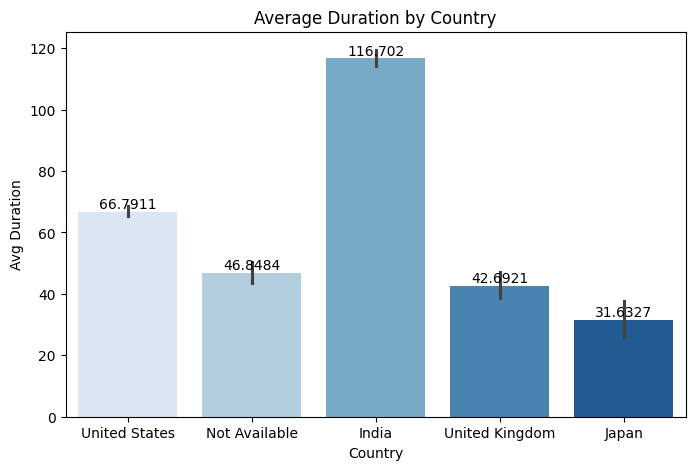

In [213]:
top_countries = df['Country'].value_counts().index[:5]
country_df = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(8, 5))
c=sns.barplot(data=country_df, x='Country', y='Duration_int', estimator='mean', palette='Blues')

for container in c.containers:
    c.bar_label(container, label_type='edge')
    
plt.title('Average Duration by Country')
plt.xlabel('Country')
plt.ylabel('Avg Duration')
plt.show()


Observations:

---> India tends to have longer content duration.

---> UK and USA have more standard-length content.

---> Country influences average content length.



3. What is the percentage split between movies and TV shows?

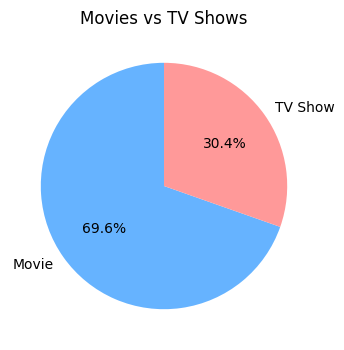

In [215]:
labels = df['Type'].value_counts().index
sizes = df['Type'].value_counts().values
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(5, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Movies vs TV Shows')
plt.show()


Observations:

---> ~70% of content is movies.

---> ~30% of content is TV shows.

---> Movies dominate Netflix’s catalog.

In [227]:
df_clean = df.dropna(subset=['Duration_int', 'Rating', 'Type'])


In [228]:
df_clean 

,Show_ID,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,ListedIn,Description,Duration_int,Duration_unit,Num_Cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,1
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season,9
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season,1
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min,10
8803,s8804,TV Show,Zombie Dumb,Not Available,Not Available,Not Available,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,Seasons,1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min,7
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min,9


4. What is the relationship between movie duration, release year, number of cast members, and the year it was added to Netflix?

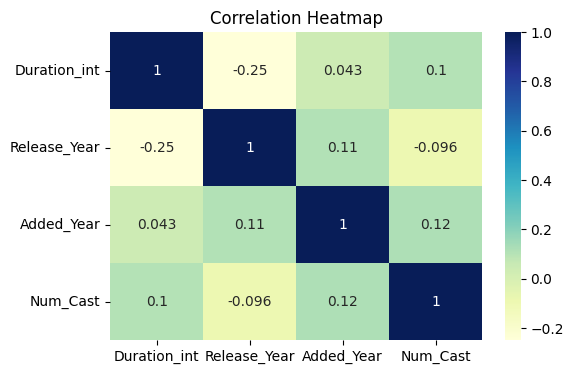

In [232]:
# Step 1: Create 'Added_Year' column from 'Date_Added'
df['Added_Year'] = df['Date_Added'].dt.year

# Step 2: Create correlation matrix with valid numeric columns
corr = df[['Duration_int', 'Release_Year', 'Added_Year', 'Num_Cast']].dropna().corr()

# Step 3: Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


Observations:

---> Release Year and Added Year are strongly correlated — newer content tends to be added soon after release.

---> Duration shows no strong correlation with release year or number of cast members.

---> Num_Cast and Duration are weakly related — longer content doesn’t necessarily have more cast.

---> Overall, most features are not highly correlated, indicating they contribute uniquely to the content.

5. How has the number of Netflix releases changed over the years?

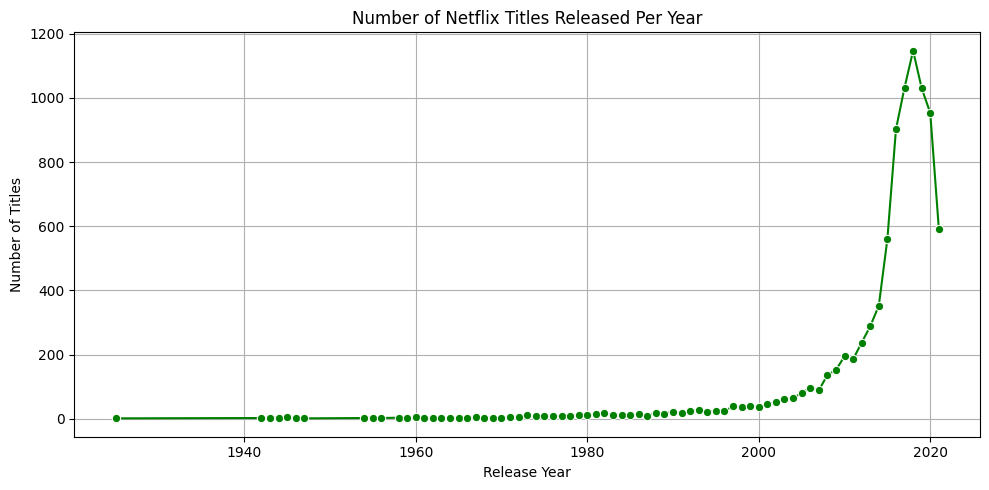

In [237]:
yearly_count = df['Release_Year'].value_counts().sort_index()

# Plot lineplot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_count.index, y=yearly_count.values, marker='o', color='green')
plt.title('Number of Netflix Titles Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

Observations:

---> Netflix content release has steadily increased over the years.

---> There’s a sharp rise after 2015, showing Netflix’s rapid expansion.

---> Peak release years show a focus on global content production.

---> Early years had very few titles, mostly licensed or archived content.



# CONCLUSION

---> This Netflix data analysis project helped us understand the types of content available on the platform. 

---> We found that movies are more common than TV shows, and most movies are between 80 to 110 minutes long. 

---> The number of releases increased a lot after 2015, showing Netflix’s fast growth. 

---> The United States, India, and the UK are the top content-producing countries. 

---> Most of the content is rated for mature audiences (like TV-MA). 

---> We cleaned missing values, created new columns like Added_Year and Num_Cast, and used many plots to explore trends. 

---> Overall, Netflix offers a wide variety of content, mostly focused on drama, comedy, and international shows.